In [43]:
import numpy as np
import numpy.linalg as la
from itertools import combinations
from scipy.linalg import toeplitz
from collections import Counter
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import kblock_ising_model as kb

from scipy.integrate import solve_ivp

#Compare to other method

import sys
import os
from time import time
sys.path.append("../../../../src/")
#Imports
import single_particle_sector as sps
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter


In [44]:
##Time Evolution Stuff
def h_linear(t,tau,h0,hf):
    return h0-(h0-hf)*(t/tau)
# Define RHS
def rhs(t, X, k, J, h,h0,hf, tau):
    u, v = X
    hi = h(t, tau, h0,hf)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]

In [76]:
#Model params
L = 100
h0 = 0
hf = 5
tau = 5
J = 1.0
N_steps = 100
#Define momentum
k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L)
u0, v0 = kb.U(k,h0)
t_span = (0, tau)
t_eval = np.linspace(*t_span, N_steps)
h_plotting = h_linear(t_eval,tau,h0,hf)
#Time Evolution 
#Kblock Method
U_kblock_t = np.zeros((2, L, len(t_eval)), dtype=complex)
for i, k_i in enumerate(k):
    y0 = np.array([u0[i], v0[i]], dtype=complex)
    sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, args=(k_i, J, h_linear, h0,hf, tau), method='RK45',max_step=0.05)
    U_kblock_t[0, i, :] = sol.y[0]  # u_k(t)
    U_kblock_t[1, i, :] = sol.y[1]  # v_k(t)

#Ground States

U_gs = []
for h in h_plotting:
    U_gs.append(kb.U(k,h))

In [326]:
#Basic Projector stuff
parity = True
max_n = 12
P_timeevolved = np.empty([max_n,N_steps])
P_GS = np.empty([max_n,N_steps])

for i in range(N_steps):
    Ugs = U_gs[i]
    Ut= U_kblock_t[:,:,i]
    for n in range(1,max_n+1):
        P_GS[n-1,i] = kb.P_n(n,Ugs,k,parity)
        P_timeevolved[n-1,i]= kb.P_n(n,Ut,k,parity)        


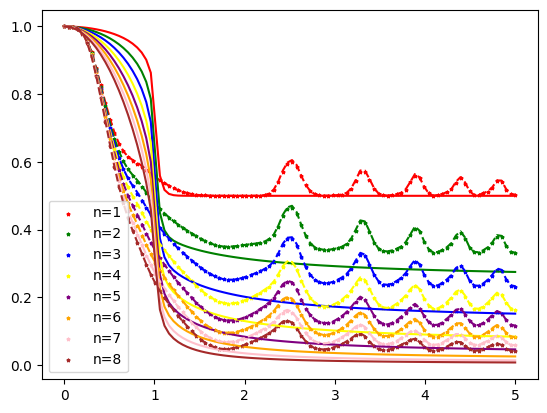

In [95]:
colors = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "brown", "black", "white"]

for i in range(max_n):
    plt.scatter(t_eval,P_timeevolved[i,:],s=5,label=f"n={i+1}",marker='*',color=colors[i])
    plot(t_eval,P_GS[i,:],color=colors[i])
    plot(t_eval,P_BGS_t[i,:],linestyle='--',color=colors[i])

plt.legend()

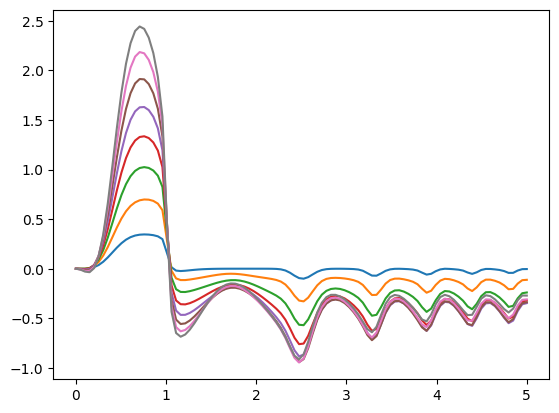

In [84]:
for i in range(max_n):
    time_evolved = P_timeevolved[i,:]
    ground_states = P_GS[i,:]
   # plt.scatter(t_eval,(ground_states-time_evolved)/(i+1),s=5,label=f"n={i+1}")
    plt.plot(t_eval,(ground_states-time_evolved)*(1+i),label=f"n={i+1}")
#plt.ylim(10e-6,0.1)
#plt.yscale('log')
#plt.legend()

In [227]:
N_steps = 100
L = 200
h0 = 0
hf = 5
J = 1.0

P_bgs_tau =[]
taus = np.logspace(-1,2.5,100)
for tau in taus:
    U_bdgt_t   = sps.TFIM_time_evolve(N_steps,tau, h0,hf, J, L, U0= None, bc = "ABC")
    P_BGS_t = np.empty([max_n])
    G = [sps.G_tfim(U_bdgt_t[i][:,L:]) for  i in range(N_steps-10,N_steps)]
    for n in range(1,max_n+1):
        P_BGS_t[n-1]= np.mean([sps.P_n(n,Gi,L,parity)-P_GS[n-1,-1] for Gi in G])
    P_bgs_tau.append(P_BGS_t)

/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: divide by zero encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: overflow encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: invalid value encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnik

In [214]:
# d

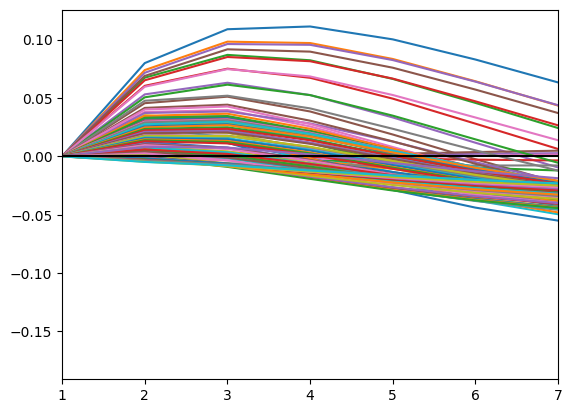

In [230]:
P_bgs_tau = np.array(P_bgs_tau)
plot(P_bgs_tau.T-P_bgs_tau.T[1,:])
plt.xlim(1,max_n-1)
plt.hlines(0,0,10,color="black")

(np.float64(0.1), np.float64(316.22776601683796))

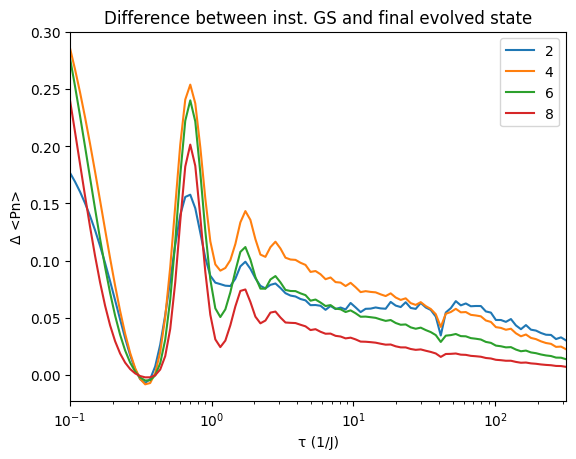

In [238]:
ns = np.arange(1,max_n+1)
plt.plot(taus,P_bgs_tau[:,1::2],label=ns[1::2])
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.ylabel("Δ <Pn>")
plt.xlabel("τ (1/J)")
plt.title("Difference between inst. GS and final evolved state")
plt.xlim(taus[0],taus[-1])

/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/2545615073.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


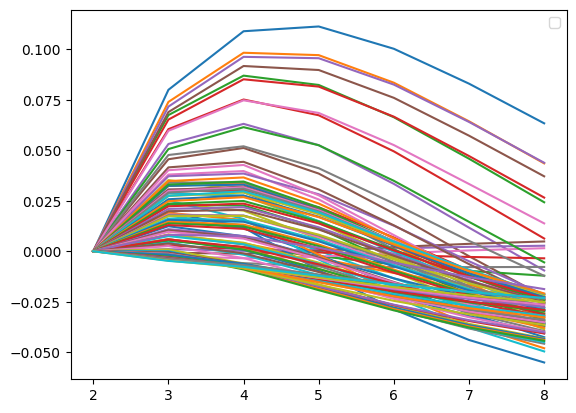

In [235]:
ns = np.arange(1,max_n+1)
plot(ns[1:],P_bgs_tau[:,1:].T-P_bgs_tau[:,1].T)
#plt.yscale("log")
plt.legend()

In [251]:
N_steps = 100
L = 200
h0 = 0
hf = 5
J = 1.0

U_bgs_tau =[]
taus = np.logspace(-1,2,10)
for tau in taus:
    U_bdg_t   = sps.TFIM_time_evolve(N_steps,tau, h0,hf, J, L, U0= None, bc = "ABC")
    U_bgs_tau.append(U_bdg_t)

/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: divide by zero encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: overflow encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: invalid value encountered in matmul
  dUdt = -1j*2*H@U


In [325]:
nmax = 12
parity = True

P_tau = []
for U_t in U_bgs_tau:
    P_t = np.empty([nmax,N_steps])
    for i in range(len(U_t)):
        G = sps.G_tfim(U_t[i][:,L:])
        for n in range(1,nmax+1):
            P_t[n-1,i] = sps.P_n(n,G,L,parity)
    P_tau.append(P_t)


/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: divide by zero encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: overflow encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: invalid value encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:174: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] =

/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3017154857.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1)


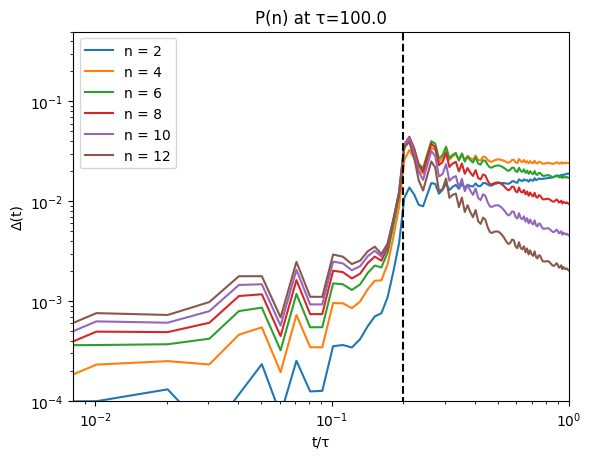

In [427]:
tau = 9

for n in range(1,nmax,2):
    time_range = np.linspace(0,taus[tau],N_steps)
    #plt.scatter(time_range,(P_tau[tau][n,:].T),s=5)
    #plt.plot(time_range,P_GS[-1,:])
    plt.plot(time_range/taus[tau],np.abs(P_tau[tau][n,:].T-P_GS[n,:].T),label=f"n = {n+1}")

plt.xscale("log")
plt.yscale("log")
A = 1/np.sqrt(2)/np.pi/2
kibble_zurek_times = np.logspace(-2,2,50)
#plt.plot(kibble_zurek_times,(kibble_zurek_times)**(-1/2)*A,color="black",linestyle="--",label=f"A(t)^-1/2")
plt.title(f"P(n) at τ={str(taus[tau])[:5]}")
plt.legend()
plt.ylim(0.0001,.5)
plt.xlim(0,1)
plt.xlabel("t/τ")
plt.ylabel("Δ(t)")
plt.vlines(0.2,0,.5, color="black",linestyles="--")

/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3468143544.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1)


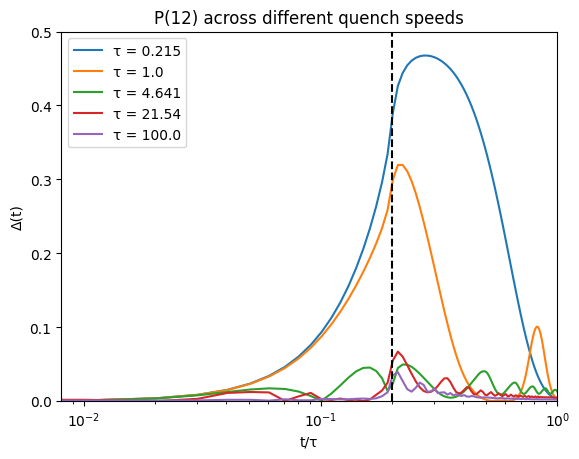

In [445]:
n = 11

for tau in range(1,len(taus),2):
    time_range = np.linspace(0,taus[tau],N_steps)
    #plt.scatter(time_range,(P_tau[tau][n,:].T),s=5)
    #plt.plot(time_range,P_GS[-1,:])
    plt.plot(time_range/taus[tau],np.abs(P_tau[tau][n,:].T-P_GS[n,:].T),label=f"τ = {str(taus[tau])[:5]}")

plt.xscale("log")
#plt.yscale("log")
A = 1/np.sqrt(2)/np.pi/2
kibble_zurek_times = np.logspace(-2,2,50)
#plt.plot(kibble_zurek_times,(kibble_zurek_times)**(-1/2)*A,color="black",linestyle="--",label=f"A(t)^-1/2")
plt.title(f"P({n+1}) across different quench speeds")
plt.legend()
plt.ylim(0.0000,.5)
#plt.yscale("log")
plt.xlim(0,1)
plt.xlabel("t/τ")
plt.ylabel("Δ(t)")
plt.vlines(0.2,0,.5, color="black",linestyles="--")

In [257]:
#Basic Projector stuff
parity = True
max_n = 4
P_timeevolved = np.empty([max_n,N_steps])
P_GS = np.empty([max_n,N_steps])

for i in range(N_steps):
    Ugs = U_gs[i]
    Ut= U_kblock_t[:,:,i]
    for n in range(1,max_n+1):
        P_GS[n-1,i] = kb.P_n(n,Ugs,k,parity)
        P_timeevolved[n-1,i]= kb.P_n(n,Ut,k,parity)        


/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/kblock_ising_model.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = D(Nd,T,k)


In [489]:
def TFIM_time_evolve(N_steps,tau, h0,hf, J, L, U0= None, bc = "ABC"):

    def rhs(t, U_flat, h_t, tau, h0, hf, J,bc):
        h = hf
        H = sps.H_bdg(h,L,J)
        U = U_flat.reshape(2*L,2*L)
        dUdt = -1j*2*H@U
        return dUdt.flatten()
    #ABSOLUTELY NECESSARY STEP
   # print(type(U0))
    U0 = U0.astype(np.complex128) 
    #solver stuff 
    args = (sps.h_t,tau,h0,hf,J,bc)
    t_grid = np.linspace(0,tau,N_steps)
    sol = solve_ivp(rhs, [0, tau], U0.flatten(), args=args, t_eval=t_grid, method="RK45", vectorized=False, dtype=np.complex128)
    
    
    U_t = np.array([sol.y[:, i].reshape(2*L, 2*L) for i in range(len(sol.t))])
    #print(sol.message)
    return U_t

/Users/kristianmunnikhuis/miniconda3/envs/TFIM/lib/python3.11/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: divide by zero encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: overflow encountered in matmul
  dUdt = -1j*2*H@U
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:281: RuntimeWarning: invalid value encountered in matmul
  dUdt = -1j*2*H@U
/var/folders/tb/9nr_h

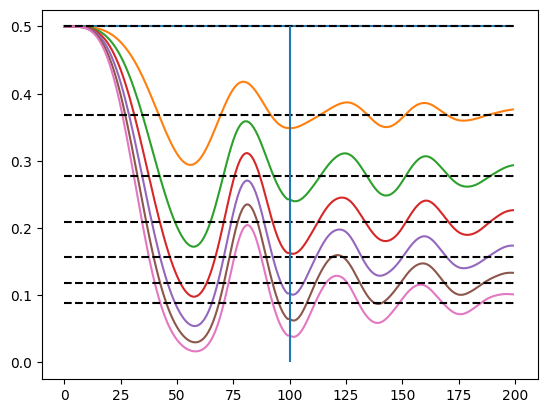

In [520]:
N_steps = 100
avg_steps = 100
avg_n = 7
L = 200
h0 = 0
hf = 5
J = 1.0


tau = 1
t0 = tau

U_test   = sps.TFIM_time_evolve(N_steps,tau, h0,hf, J, L, U0= None, bc = "ABC")
U_time_avg = TFIM_time_evolve(N_steps,t0, hf,hf, J,L, U0= U_test[-1], bc = "ABC")

P_BGS_t = np.empty([avg_n,avg_steps+N_steps])
G_test = [sps.G_tfim(U_test[i][:,L:]) for i in range(0,N_steps)]
G = G_test+ [sps.G_tfim(U_time_avg[i][:,L:]) for  i in range(0,avg_steps)]
for n in range(1,avg_n+1):
    for ti in range(avg_steps+N_steps):
        Gi = G[ti]
        P_BGS_t[n-1,ti]= sps.P_n(n,Gi,L,parity)
plot(P_BGS_t.T)

plt.hlines(np.mean(P_BGS_t[:,N_steps:], axis=1),0,len(G),colors="black",linestyles="--")
plt.vlines(N_steps,0,0.5)

In [ ]:
N_steps = 100
avg_steps = 100
avg_n = 12
L = 200
h0 = 0
hf = 5
J = 1.0


taus = np.logspace(-1,2,100)
P_bgs_tau = []
for tau in taus:
    U_test   = sps.TFIM_time_evolve(N_steps,tau, h0,hf, J, L, U0= None, bc = "ABC")
    U_time_avg = TFIM_time_evolve(N_steps,tau, hf,hf, J,L, U0= U_test[-1], bc = "ABC")

    P_BGS_t = np.empty([avg_n,avg_steps+N_steps])
    G_test = [sps.G_tfim(U_test[i][:,L:]) for i in range(0,N_steps)]
    G = G_test+ [sps.G_tfim(U_time_avg[i][:,L:]) for  i in range(0,avg_steps)]
    for n in range(1,avg_n+1):
        for ti in range(avg_steps+N_steps):
            Gi = G[ti]
            P_BGS_t[n-1,ti]= sps.P_n(n,Gi,L,parity)
    plt.figure()
    plot(P_BGS_t.T)

    plt.hlines(np.mean(P_BGS_t[:,N_steps:], axis=1),0,len(G),colors="black",linestyles="--")
    plt.vlines(N_steps,0,0.5)
    P_bgs_tau.append(P_BGS_t)


/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3385158109.py:7: RuntimeWarning: divide by zero encountered in matmul
  dUdt = -1j*2*H@U
/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3385158109.py:7: RuntimeWarning: overflow encountered in matmul
  dUdt = -1j*2*H@U
/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3385158109.py:7: RuntimeWarning: invalid value encountered in matmul
  dUdt = -1j*2*H@U
/var/folders/tb/9nr_hj116ln_8s6hck886ppc0000gn/T/ipykernel_6442/3927782821.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


In [ ]:
Uf = sps.TFIM_time_evolve(N_steps//4,tau//4, hf,h0, J, L, U0= None, bc = "ABC")[0]

In [ ]:
G = sps.G_tfim(Uf[:,L:])

P_gs_final = np.array([sps.P_n(i,G,L) for i in range(1,avg_n+1)])


/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: divide by zero encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: overflow encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:25: RuntimeWarning: invalid value encountered in matmul
  return psi @ psi.T.conj()
/Users/kristianmunnikhuis/Research Projects/subsystem_loschmidt_echo/scripts/mutual_info/exact_diag/Integrable Ising Model/../../../../src/single_particle_sector.py:174: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] =

In [ ]:
Final_Delta_time_avg = []
for i in range(0,np.shape(P_bgs_tau)[0]):
     Xi = P_bgs_tau[i][:,N_steps:].T-P_gs_final
     Final_Delta_time_avg+= [np.mean(Xi,axis=0)]



In [ ]:
Final_Delta_time_avg = np.array(Final_Delta_time_avg)
plot(Final_Delta_time_avg[:,1:],label = [i for i in range(1+1,avg_n+1)])
plt.legend()

(10, 7)